# Data Preparation

### Data Downloading

**Wine Quality Data Set**

**Task:**  Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

Dataset Link: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [0]:
# Preparing Folder for Data Download
!mkdir "data_folder"
%cd "/content/data_folder"

# Downloading Red Wine dataset (CSV file)
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Downloading White Wine dataset (CSV file)
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Downloading Description file (.names file)
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names"

In [0]:
# Reading Names file
!cat winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [2]:
# Reading White wine CSV
import pandas as pd
white_wine_data = pd.read_csv("/content/data_folder/winequality-white.csv", delimiter=";")
white_wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data visualization &  Preprocessing


1.   Combining Features
2.   Correlation Map
3.   Normalisation



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


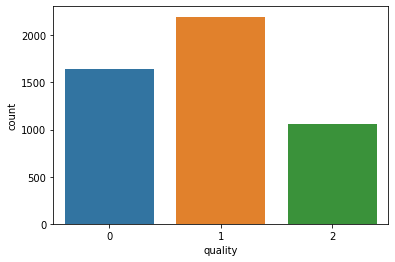

In [5]:
# EDA (Exploratory Data Analysis)
import seaborn as sns
sns.countplot(white_wine_data["quality"])

Looking at the data, it seems we've very less data for classes 3,4,8 and 9. And class 6 seems to be dominating. In such cases a naive approach is to combine the classes to major categories.

We'll go ahead with the following categories
1. Excellent: ≥ 7
2. Good: 6
3. Poor: ≤ 5



In [0]:
def categorise(x):
  if x<=5: return 0
  elif x==6: return 1
  elif x>=7: return 2

white_wine_data['quality'] = white_wine_data['quality'].apply(categorise)

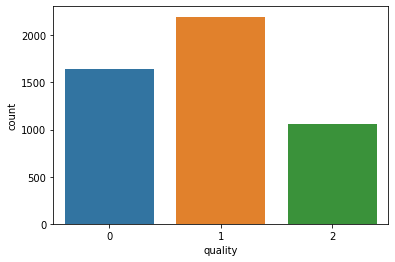

In [6]:
sns.countplot(white_wine_data["quality"])

In [7]:
# Basic stats about the data
white_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.881584
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.733030
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,2.000000


This data set has many different features and it is important to understand relationship between these in order to analyze dataset better.<br/>
For that reason, **correlation map** helps to understand these relations in a single representation. 

-1 means: There is a negative relationship between dependent and independent variables .

0 means: There is no relationship between dependent and independent variables .

1 means: There is a positive relationship between dependent and independent variables . According to these information, it can be made a good analyze about dataset and columns.

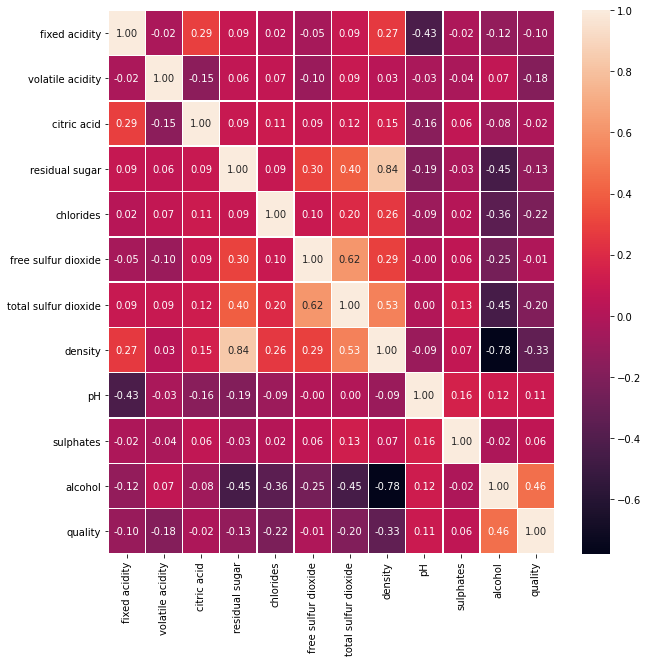

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(white_wine_data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

From such plots we can easily visualise the correlation between different features, and if required we perform feature selection.<br/>
In the above plot we can see a high correlation between **density** and **residual sugar**.

Since we've less number of features we'll go ahead will all the features for now.



---


**Normalization** typically means rescales the values into a range of [0,1]. <br>
Formula: x_norm = (x - min(x))/(max(x) - min(x))
<br><br>
**Standardization** typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).<br>
Formula: x_new = (x - mean)/std


References: https://medium.com/@dataakkadian/standardization-vs-normalization-da7a3a308c64

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [0]:
# Applying Standardization:

# Pandas automatically applies colomn-wise function in the code below.
white_wine_normalised = (white_wine_data - white_wine_data.mean() ) / white_wine_data.std()

# We don't want to normalize "quality"
white_wine_normalised["quality"] = white_wine_data["quality"]

In [10]:
white_wine_normalised.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,1
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,1
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,1
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,1
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,1


### Train, Test Split

In [0]:
from sklearn.utils import shuffle

def train_test_split(data, test_precentage = 0.2):
    data = shuffle(data).values
    total_data = len(data)
    test_len = int(test_precentage*total_data)
    train = data[:-test_len]
    test = data[-test_len:]
    return train, test


def feature_label_split(data):
    x = data[:, :-1]
    y = data[:, -1]
    return x,y

def get_data():
    train_data, test_data = train_test_split(white_wine_normalised)
    print("Train Test Split :",train_data.shape, test_data.shape)

    x_train, y_train = feature_label_split(train_data)
    x_test, y_test = feature_label_split(test_data)

    print("Train Data Shape: ", x_train.shape, y_train.shape)
    print("Test Data Shape: ", x_test.shape, y_test.shape)
    return x_train, y_train, x_test, y_test

In [12]:
# Getting Data
x_train, y_train, x_test, y_test = get_data()

Train Test Split : (3919, 12) (979, 12)
Train Data Shape:  (3919, 11) (3919,)
Test Data Shape:  (979, 11) (979,)


# Types of classification algorithms in Machine Learning



1.   Linear Classifiers: Logistic Regression, Naive Bayes Classifier
2.   Nearest Neighbor (KNN)
3.   Support Vector Machines (SVM)
4.   Decision Trees
5.   Boosted Trees
6.   Random Forest
7.   Neural Networks

Reference Link: https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14

## Utility Functions and Importing Modules

**Self defined Utility Functions**

In [0]:
# Calculating Test Accuracy
def get_accuracy(prediction, y_test):
    result = list(np.array(prediction)==y_test)
    sm = result.count(True)
    accuracy = sm/y_test.shape[0]
    return accuracy

# Making Confusion Matrix
def confusion_matrix(predictions, y_test):
    assert predictions.shape==y_test.shape, "Matrices don't match"
    cm = [[0 for x in range(3)] for y in range(3)]
    for i in range(predictions.shape[0]):
        cm[int(predictions[i])][int(y_test[i])]+=1
    for x in cm: print(x)
    return cm

## Logistic Regression

It is used as a Binary Classifier, because of **Sigmoid Activation** at the last layer, still it can be used for Multi class classification tasks using **One-vs-All Strategy**, where we train n-different models for each different category, and while testing we choose the output of the model who makes the strongest prediction.


**Formula:**

z = W*x + B <br>
Output = sigmoid(z)

(x is feature vector, W is weights vector and B is a single bias value)

Reference (Andrew Ng, Coursera): https://www.youtube.com/watch?v=-EIfb6vFJzc

**Importing Modules**

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [0]:
# Util Functions
def sigmoid(x):
    return 1/(1+math.e**(-x))

# Random Initilisation of Weights and Bias
def initialise(len_w):
    import numpy as np
    W = np.random.randn(len_w)
    b = np.random.randn()
    return W, b

In [0]:
def logistic_regression(x_train, y_train, train_class=0, epoch=500, learning_rate = 0.1):
    W, b = initialise(x_train.shape[1])
    m = x_train.shape[0]

    print(W,b)

    avg_cost, accuracy = [], []
    # Training 
    for i in range(epoch):
        total_cost = 0
        for j in range(m):
            x, y = x_train[j], y_train[j]

            # Making prediction
            y_pred = sigmoid(W@x + b)
            #print("Pred, actua ", y_pred, y)

            # Calculating simplified cost (More details: https://youtu.be/TTdcc21Ko9A)
            if y == train_class:
                cost = (1 - y_pred)
            else:
                cost = (0 - y_pred)
            
            #print("cost ", cost)
            total_cost += cost
            
            # Gradient Descent to update Weights and Bias
            W = W - learning_rate*cost*x
            b = b - learning_rate*cost
            #print(W, b)


        # Accuracy on train data
        y_pred = sigmoid(W@x_train.T + b)   

        acc = 0         
        for ij in range(len(y_pred)):
            if y_pred[ij]<0.5 and y_train[ij]==0:
                acc+=1
        acc //= m
        avg_cost += [total_cost//m]
        accuracy += [acc]
        
        print("Epoch: {}  Cost: {}  Accuracy: {}".format(i, total_cost//m, acc))

    return W, b, avg_cost, accuracy

# NOTE: @ is same as numpy.matmul() i.e normal matrix multiplication as done in Maths

In [72]:
# Getting Data
x_train, y_train, x_test, y_test = get_data()

Train Test Split : (3919, 12) (979, 12)
Train Data Shape:  (3919, 11) (3919,)
Test Data Shape:  (979, 11) (979,)


In [73]:
W, b, avg_cost, accuracy = logistic_regression(x_train, y_train)

[ 0.22641268 -0.17281852  0.51452417  1.70592558 -0.48157768  0.49755166
 -1.3845856   0.12918852  1.61373688  1.66763135  0.50094602] -0.045676657224347904
0
Epoch: 0  Cost: -1.0  Accuracy: 0
1
Epoch: 1  Cost: -1.0  Accuracy: 0
2
Epoch: 2  Cost: -1.0  Accuracy: 0
3
Epoch: 3  Cost: -1.0  Accuracy: 0
4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


Epoch: 4  Cost: -1.0  Accuracy: 0
5
Epoch: 5  Cost: -1.0  Accuracy: 0
6
Epoch: 6  Cost: -1.0  Accuracy: 0
7
Epoch: 7  Cost: -1.0  Accuracy: 0
8
Epoch: 8  Cost: -1.0  Accuracy: 0
9
Epoch: 9  Cost: -1.0  Accuracy: 0
10
Epoch: 10  Cost: -1.0  Accuracy: 0
11
Epoch: 11  Cost: -1.0  Accuracy: 0
12
Epoch: 12  Cost: -1.0  Accuracy: 0
13
Epoch: 13  Cost: -1.0  Accuracy: 0
14
Epoch: 14  Cost: -1.0  Accuracy: 0
15
Epoch: 15  Cost: -1.0  Accuracy: 0
16
Epoch: 16  Cost: -1.0  Accuracy: 0
17
Epoch: 17  Cost: -1.0  Accuracy: 0
18
Epoch: 18  Cost: -1.0  Accuracy: 0
19
Epoch: 19  Cost: -1.0  Accuracy: 0
20
Epoch: 20  Cost: -1.0  Accuracy: 0
21
Epoch: 21  Cost: -1.0  Accuracy: 0
22
Epoch: 22  Cost: -1.0  Accuracy: 0
23
Epoch: 23  Cost: -1.0  Accuracy: 0
24
Epoch: 24  Cost: -1.0  Accuracy: 0
25
Epoch: 25  Cost: -1.0  Accuracy: 0
26
Epoch: 26  Cost: -1.0  Accuracy: 0
27
Epoch: 27  Cost: -1.0  Accuracy: 0
28
Epoch: 28  Cost: -1.0  Accuracy: 0
29
Epoch: 29  Cost: -1.0  Accuracy: 0
30
Epoch: 30  Cost: -1.0  

KeyboardInterrupt: ignored

## Nearest Neighbours (KNN) Algorithm

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

References: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Sample Code: https://github.com/shubham99bisht/Machine_Learning_Tutorials/blob/master/Iris_Flower_Classification.ipynb

In [0]:
# Euclidean Distance Function

# Distance between (x1, y1) and (x2, y2)
# dist = sqrt( (x2-x1)**2 + (y2-y1)**2 )

def distance(data_point1, data_point2):
    assert data_point1.shape == data_point2.shape, "Data points not of same dimension"
    
    number_of_features = len(data_point1)
    dist = 0
    for i in range(number_of_features):
        dist += (data_point1[i] - data_point2[i])**2
    return dist**0.5

print("Distance between [0,0], [3,4]: ",distance(np.array([0,0]), np.array([3,4])))

Distance between [0,0], [3,4]:  5.0


In [0]:
# KNN doesn't require training :p

def KNN_algorithm(X_train, y_train, x_test):
    y_pred = []
    for test_data_point in x_test:
        label, max_dist = None, 10**6
        for pt in range(len(X_train)):
            dist = distance(test_data_point, X_train[pt])
            if dist < max_dist:
                max_dist = dist
                label = y_train[pt]
        y_pred.append(label)
    return np.array(y_pred)
    

In [0]:
# Getting Data
x_train, y_train, x_test, y_test = get_data()

Train Test Split : (3919, 12) (979, 12)
Train Data Shape:  (3919, 11) (3919,)
Test Data Shape:  (979, 11) (979,)


In [0]:
# Apply KNN on random test data to match the prediction

i = np.random.randint(0,100)

print("Working on test case: {}".format(i))

y_pred = KNN_algorithm(x_train, y_train, x_test[i].reshape(1, -1))
print("Prediction: ",y_pred, "\nExpected:", y_test[i])

Working on test case: 80
Prediction:  [1.] 
Expected: 1.0


In [0]:
# Apply KNN on entire test data (takes time to run)

predictions = KNN_algorithm(x_train, y_train, x_test[:500,:])

In [0]:
# Calculating Accuracy (Function defined in Utils section above)

accuracy = get_accuracy(predictions, y_test[:500])
print(accuracy)

0.716


[122, 32, 4]
[43, 156, 25]
[2, 36, 80]


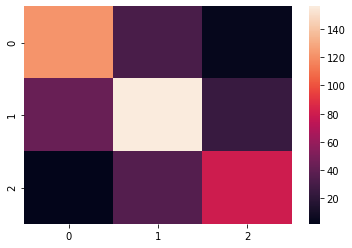

In [0]:
# Plotting Confusion Matrix (Function defined in Utils section above)

cm = confusion_matrix(predictions, y_test[:500])
sns.heatmap(cm)

## Support Vector Machine (SVM)

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


Reference Link: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
